# Evaluación Final

Saulo César Beltrán Romero A0829482

Para comenzar se importan las librerías por utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

Posteriormente se llama a la base de datos con la cual estaremos trabajando:

In [2]:
df = pd.read_csv('datasets/cwurData.csv')

# Acomodo y Limpieza

Ahora se realizará una limpieza para seleccionar solamente los datos deseados.

Dentro de esta limpieza se eliminarán las columnas, ‘alumni_employment’ y ‘broad_impact’, pues se consideró que son de baja importancia para la base de datos.


- Pregunta de investigación

Dentro del año 2015, ¿Cuáles son las 6 escuelas con un mejor ranking mundial? 


Para dar respuesta a esta pregunta, primeramente, se eliminaron las observaciones con valores de la columna ‘year’ menores al 2015, permitiendo así, un análisis sobre el año mas cercano dentro de la base de datos.
De igual manera, para lograr contestar la pregunta de las 6 escuelas con un mejor ranking, se eliminaron las observaciones que tuvieran un valor menor que 6 en la columna ‘world_rank’.

In [3]:
df.head(2)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012


In [4]:
#Eliminación de la columna de ‘broad_impact’ y 'alumni_employment’ 
df.drop(['broad_impact'], axis=1, inplace=True)
df.drop(['alumni_employment'], axis=1, inplace=True)

#Eliminación de las observaciones que no sean del 2015 y que se encuentren fuera del rank #6
df1 = df[(df['year']>= 2015) & (df['world_rank']<= 6)]
df1.head(6)

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,3,100.00,2015
1201,2,Stanford University,USA,2,9,4,5,3,3,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,2,15,2,2,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,5,11,6,12,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,10,7,12,7,15,96.46,2015
1205,6,Columbia University,USA,4,13,9,13,13,11,4,96.14,2015


Dentro de esta tabla se puede observar las 6 escuelas con mejor ranking mundial en el año 2015.

De igual manera, se puede observar que, a diferencia de la tabla de arriba, ya no existen observaciones fuera del año 2015 dentro de las observaciones. Así mismo, se puede observar que las columnas 'broad_impact' y  ‘alumni_employment’ ya no existen dentro de la tabla.
- Pregunta de investigación

¿Cuál será el nuevo acomodo de la tabla?

Se pondrá como índice la columna ‘institution’, permitiendo tener una visión más clara sobre las observaciones según el año en el que fueron tomadas.

In [5]:
#Etiquetas de las columnas fueron transformadas a strings.
df1.columns = list(map(str, df1.columns))

In [6]:
#Hacer ‘institution’ el indice.
df1.set_index('institution', inplace=True)
df1.head(6)

,world_rank,country,national_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,year
institution,,,,,,,,,,,
Harvard University,1,USA,1,1,1,1,1,1,3,100.00,2015
Stanford University,2,USA,2,9,4,5,3,3,10,98.66,2015
Massachusetts Institute of Technology,3,USA,3,3,2,15,2,2,1,97.54,2015
University of Cambridge,4,United Kingdom,1,2,5,11,6,12,48,96.81,2015
University of Oxford,5,United Kingdom,2,7,10,7,12,7,15,96.46,2015
Columbia University,6,USA,4,13,9,13,13,11,4,96.14,2015


# Graficas

# Pie Chart

A primera instancia se agruparon los datos siguiendo a ‘institution’, posteriormente fueron filtrados por los valores más altos a los más bajos de la columna ‘quality_of_education’. Preparándonos así, para graficar estos valores.

In [7]:
df_institution = df1.groupby('institution', 
                           axis=0).sum()
df_institution.sort_values(['quality_of_education'], 
                          ascending=False, 
                          axis=0, 
                          inplace=True)
df_institution.head(6)

,world_rank,national_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,year
institution,,,,,,,,,,
Columbia University,6,4,13,9,13,13,11,4,96.14,2015
Stanford University,2,2,9,4,5,3,3,10,98.66,2015
University of Oxford,5,2,7,10,7,12,7,15,96.46,2015
Massachusetts Institute of Technology,3,3,3,2,15,2,2,1,97.54,2015
University of Cambridge,4,1,2,5,11,6,12,48,96.81,2015
Harvard University,1,1,1,1,1,1,1,3,100.00,2015


- Pregunta de investigación

De las 6 escuelas con mejor ranking mundial, ¿Cuál es la que tiene un score mayor?

Para contestar esta pregunta, se dio uso a un gráfico de pastel, o pie chart. Dentro de este se puede observar que escuela dentro de las 6 seleccionadas tiene un mejor porcentaje de ‘score’, permitiéndonos conocer de manera visual la respuesta a la pregunta.

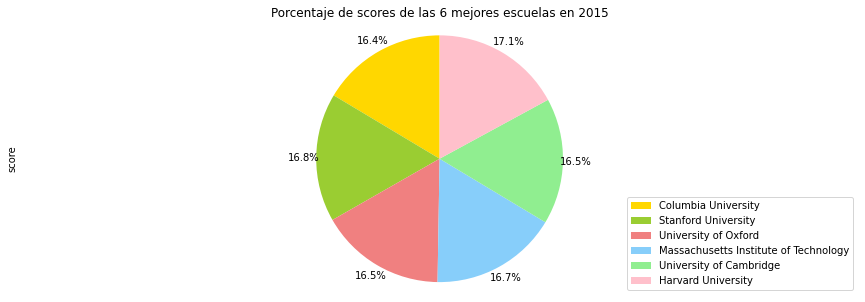

In [8]:
# autopct create %, start angle represent starting point
colors_list = ['gold', 'yellowgreen', 'lightcoral',
               'lightskyblue', 'lightgreen', 'pink']

df_institution['score'].plot(kind ='pie',
                            figsize =(15,5),
                            autopct ='%1.1f%%', 
                            startangle = 90,     
                            shadow = False,
                            labels = None,
                            pctdistance = 1.1,
                            colors = colors_list,
                            )

plt.title('Porcentaje de scores de las 6 mejores escuelas en 2015')
plt.axis('equal') 
plt.legend(labels = df_institution.index, loc='lower right') 

plt.show()

Como se puede observar dentro de la gráfica obtenida, dentro de las 6 escuelas con mejor ranking, la que tiene el valor de ‘score’ más alto es ‘Harvard University’

# Box Plot

- Preguntas de investigación

Dentro de los primeros 100 rankings del 2015, ¿Cuál es el valor mínimo? ¿Y el valor máximo? 

¿Dentro de que valores se encuentran dentro del tercer cuartil? 

¿Se presentan valores atípicos?

Debido a que se esta pidiendo trabajar con diferentes datos de la grafica pasada, se tuvo que realizar una nueva variable la cual separara los primeros 100 rankings mundiales del 2015. Esta variable se puede observar en el siguiente cuadro de texto:

In [9]:
df2 = df[(df['year']>= 2015) & (df['world_rank']<= 100)]

df2_institution = df2.groupby('institution', 
                           axis=0).sum()

Después se realizó el box plot con los datos seleccionados:

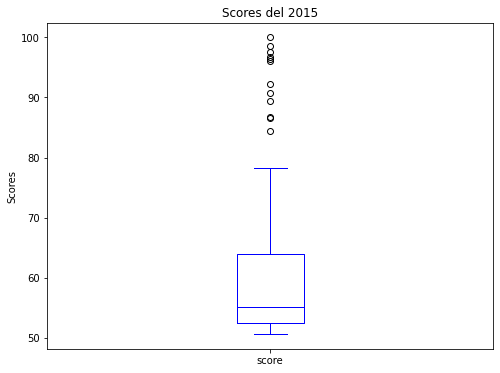

In [10]:
df2_institution['score'].plot(kind = 'box',
                            figsize=(8, 6),
                            color = 'blue')
plt.title('Scores del 2015')
plt.ylabel('Scores')

plt.show()

In [11]:
df2_institution['score'].describe()

count    100.00000
mean      61.13600
std       13.37186
min       50.60000
25%       52.45500
50%       55.17500
75%       63.89500
max      100.00000
Name: score, dtype: float64

Una vez creado el box plot y conociendo los datos completos, podemos responder a las preguntas.

Respuestas:


- El valor mínimo encontrado dentro de los datos seleccionados es de 50.6.

- El valor máximo encontrado dentro de los datos seleccionados es de 100.

- 75% de los scores en el periodo del 2015 se encuentran entre 63.895 o menos.

- En la parte superior de la gráfica se pueden observar algunos valores atípicos, estos pertenecen a las universidades con los ‘score’ mas altos.	


# Scatter Plot

- Pregunta de investigación

Realiza un diagrama de dispersión de todos los datos, añade la línea de regresión y realiza tus conclusiones.

Debido a que se solicitó utilizar todos los datos, se dará uso a la variable ‘df’ (ya que esta tiene los datos originales).

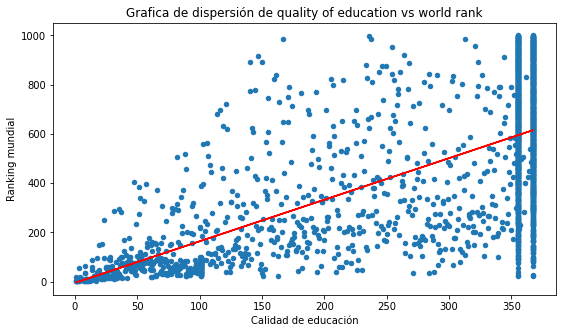

In [12]:
#Definición de variables para poder graficarlas.
x = df['quality_of_education']
y = df['world_rank']
fit = np.polyfit(x, y, deg=1)

#Grafica de dispersión.
df.plot(kind = 'scatter',
        x='quality_of_education', 
        y='world_rank',
        figsize =(9,5))


plt.title('Grafica de dispersión de quality of education vs world rank')
plt.xlabel('Calidad de educación')
plt.ylabel('Ranking mundial')

#Línea de regresión.
plt.plot(x, 
         fit[0] * x + fit[1], 
         color='red')

plt.show()

Una vez hecho el diagrama de dispersión, podemos concluir que:

Los valores comienzan a dispersarse a partir del valor 50 aproximadamente, esto se puede notar por la separación de los puntos conforme los valores avanzan. De igual manera, esto se puede notar debido a que los valores no se encuentran cercanos a la línea de regresión conforme los valores avanzan. 

Conocemos que presenta una tendencia hacia arriba, pues sus valores suben. Se puede notar una conglomeración de datos a la derecha, por lo que podríamos suponer un sesgo en esta. 
